In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def my_harris_detector(img, window_size=3, k=0.04,threshold=1e-5):
    
    # 1. sobel Ix,Iy
    Ix = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=3)
    Iy = cv2.Sobel(img, cv2.CV_32F,0,1,ksize=3)

    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy

    Sxx = cv2.GaussianBlur(Ixx,(window_size,window_size),sigmaX=1)
    Syy = cv2.GaussianBlur(Iyy,(window_size,window_size),sigmaX=1)
    Sxy = cv2.GaussianBlur(Ixy,(window_size,window_size),sigmaX=1)

    detM = (Sxx*Syy) - Sxy**2

    trM = Sxx + Syy

    R_ = detM - k*(trM**2)

    corners = np.argwhere(R_ > threshold*R_.max() )

    corners = np.flip(corners,axis=1)

    return R_, corners





In [32]:
def harris_detector(img, threshold=0.1):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = np.float32(gray_img)
    dst = cv2.cornerHarris(gray_img,blockSize=2,ksize=3,k=0.04)
    # print(dst)
    # print(dst.shape)
    keypoints = np.argwhere(dst > threshold*dst.max())

    keypoints = np.flip(keypoints,axis=1)

    responses = dst[dst > threshold*dst.max()]

    return keypoints, responses

def anms(keypoints, responses, n_point=50):
    num_keypoints = len(keypoints)
    radii = np.full(num_keypoints,np.inf)

    for i in range(0,num_keypoints):
        for j in range(0,num_keypoints):
            if responses[j] > responses[i]:
                distance = np.linalg.norm(keypoints[i] - keypoints[j])
                if distance < radii[i]:
                    radii[i] = distance
    sorted_indices = np.argsort(radii)[::-1]

    select_indices = sorted_indices[:n_point]

    return keypoints[select_indices]


    


img shape (512, 512, 3)
orin keypoints107


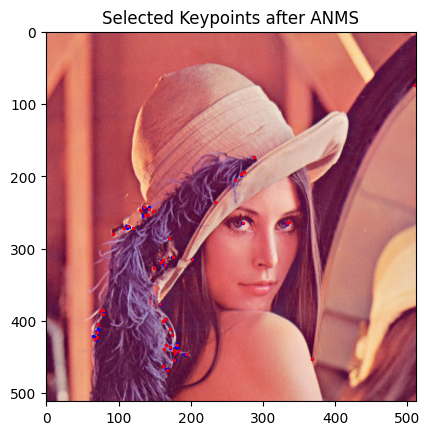

: 

In [34]:
img = cv2.imread('../images/Lena.png')
print("img shape {}".format(img.shape))
keypoints, responses = harris_detector(img)
print("orin keypoints{}".format(len(keypoints)))
select_keypoints = anms(keypoints,responses)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.scatter(keypoints[:, 0], keypoints[:, 1], c='b', s=2)
plt.scatter(select_keypoints[:, 0], select_keypoints[:, 1], c='r', s=2)
plt.title('Selected Keypoints after ANMS')
plt.show()